## Goal of the Project
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. Analyze customer profiles and come up with a customer retention strategy.

## Table of Contents
### [Step 1. Download the data](#1)
### [Step 2. Carry out exploratory data analysis (EDA)](#2)
### [Step 3. Build a model to predict user churn](#3)
### [Step 4. Create user clusters](#4)
### [Step 5. Come up with conclusions and basic recommendations on working with customers](#5)

<a id= '1'></a>

## Step 1. Download the data

In [1]:
# installing libraries
#!pip install matplotlib -U
#!pip install pandas -U
#!pip install numpy -U
#!pip install scipy -U
#!pip install plotly -U

In [2]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import plotly.express as px

# ignoring warnings
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")
        
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

In [3]:
data = pd.read_csv('/datasets/gym_churn_us.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
# converting dataframe columns to lowercase letters
data.columns = data.columns.str.lower()

In [6]:
data.shape

(4000, 14)

 - There are 4000 rows and 14 columns where `churn` is our **target variable** and remaining 13 columns are **feature variables**.

In [7]:
data.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [8]:
data.tail(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


 - All feature varibles have Numerical and Binary (0,1) values.

### Conclusion

Data was downloaded and studied. The following outcomes can be drawn so far:
 - There are 4000 rows and 14 columns where `churn` is our **target variable** and remaining 13 columns are **feature variables**.
 - All column names were converted to lowercase letters for the sake of simplicity.
 - Some feature values (e.g. `gender`, `near_location`, `partner`, `promo_friends`, `group_visits`) have binary values, whereas (e.g. `age`, `avg_additional_charges_total`, `month_to_end_contract`, `lifetime`) are continious values.
 - All datatypes are numeric which is suitable for our further analysis

<a id= '2'></a>

## Step 2. Carry out exploratory data analysis (EDA)

#### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).

In [9]:
# stats
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [10]:
data['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

In [11]:
data['phone'].value_counts()

1    3614
0     386
Name: phone, dtype: int64

The data has been studied through `describe()` method. The following conclusions can be made:
 - The data has almost equal share of males and females, mean = 0.51
 - Majority of customers live near the gym, mean = 0.84
 - Less than 50% of customers are from partner companies, mean = 0.48
 - Majority of the customers have provided their phone numbers
 - 75 % of total customers have 6-month contract periods
 - 40 % of total customers visit group sessions
 - The average age of our customers is 29. Every second person who comes to the gym is 29 years old.
 - Every second client spends 136 USD per month on other gym sercvises(e.g. cafe, athletic goods, cosmetics, massages)
 - On average, our clients have 4 months left till the end of their contract
 - On average, customers visit gym 2 times per week over their lifetime

In [12]:
# missing values
data.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [13]:
data.duplicated().sum()

0

#### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [14]:
churn_stats = data.groupby(['churn']).mean()
churn_stats

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


The data was divided into two groups: `churn`= 0 are customers who are still with us, `churn` = 1 clients who left the gym. By looking at their features' mean values, followings can be stated:
 - Visitors who live near gym are less likely to leave in comparison with those who live far from the gym location.
 - Visitors who are employees of the partner company are more loyal than those who are not employees of a partner company.
 - Customers who visit the gym from their friends' referall also tend to be more loyal than those who found the gym by themselves.
 - Its also interesting to see that if the client visits group sessions they are more likely to stay.
 - The average age of clients who leave is 26, most probably students who came for trial.
 - It is also logical to see that customers whose contract is close to end, leave 1 month earlier.
 - Those who spend money on other activities also tend to stay in the gym and use its service for longer period.
 - Those who visit gym twice in a week tend to be more loyal than those who spend less time in the gym.


In [15]:
# filtering data to customer churn; 1-left the company, 0-staying
churned = data.query('churn == 1 ')
not_churned = data.query('churn == 0 ')

In [16]:
churned.sample()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2118,1,1,0,0,1,1,0,32,55.951046,1.0,3,0.883247,0.215302,1


In [17]:
not_churned.sample()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3544,1,1,0,0,1,12,0,33,117.823717,12.0,7,2.470885,2.452513,0


#### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

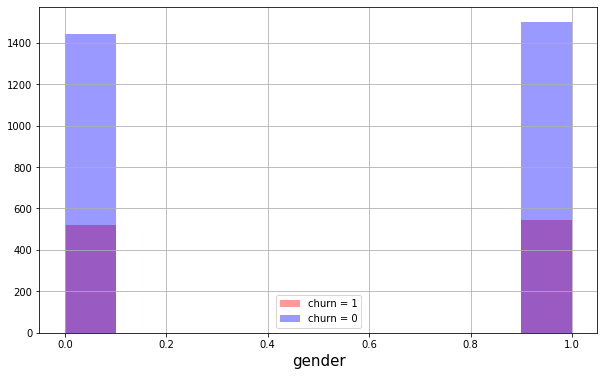

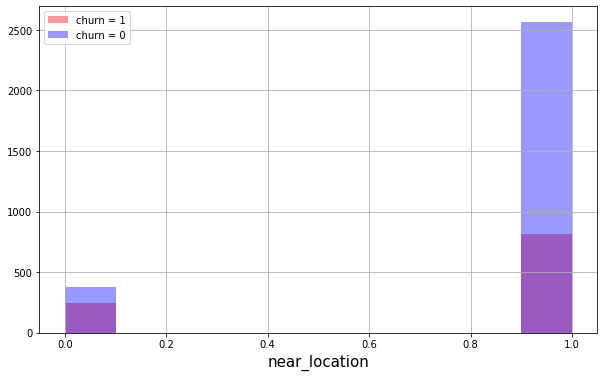

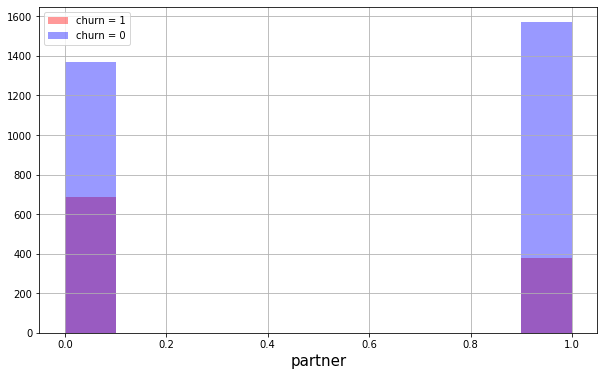

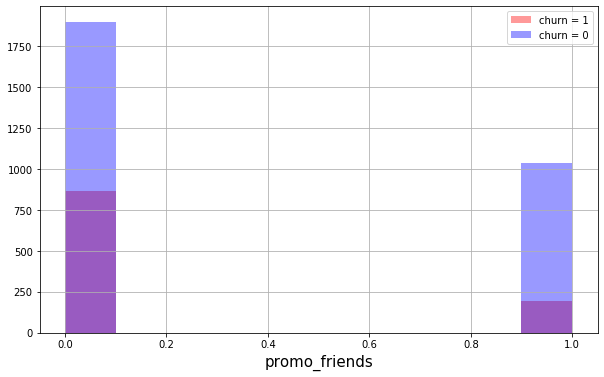

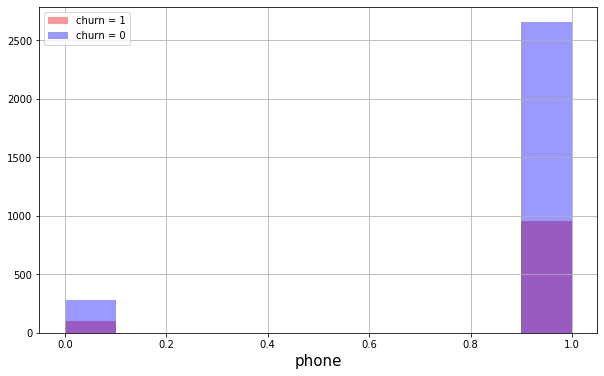

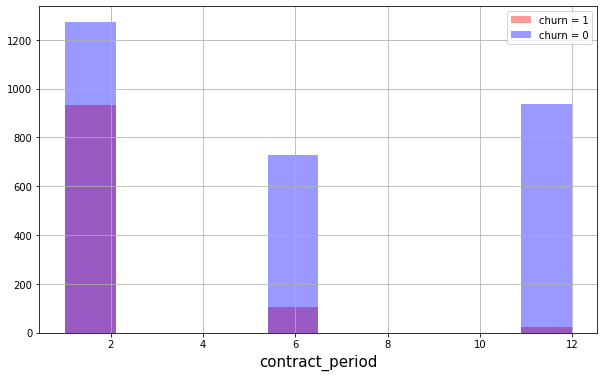

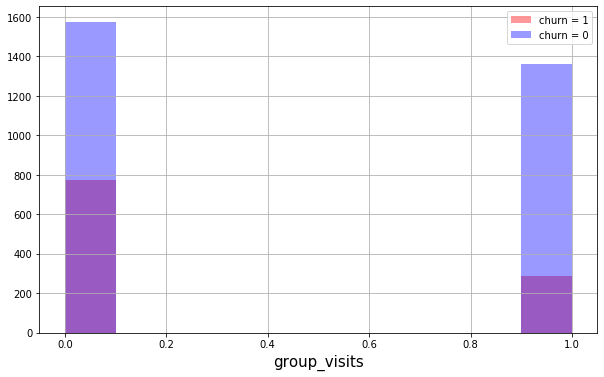

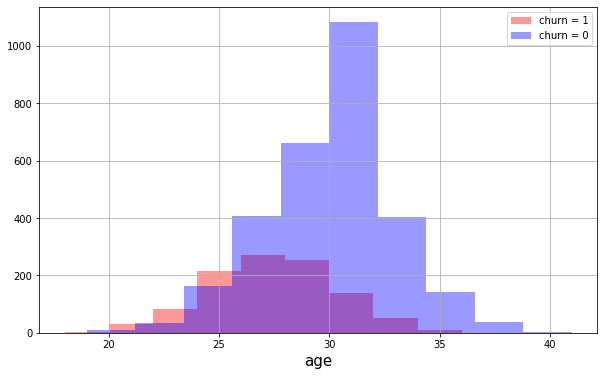

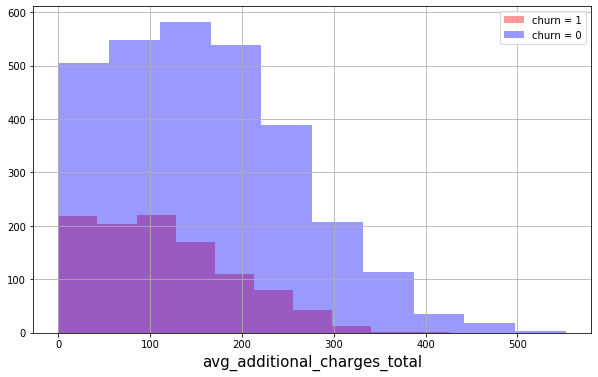

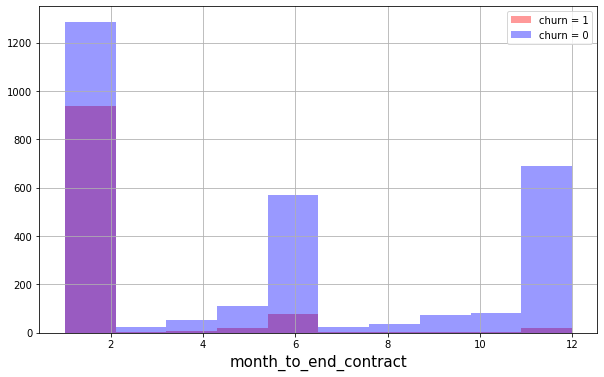

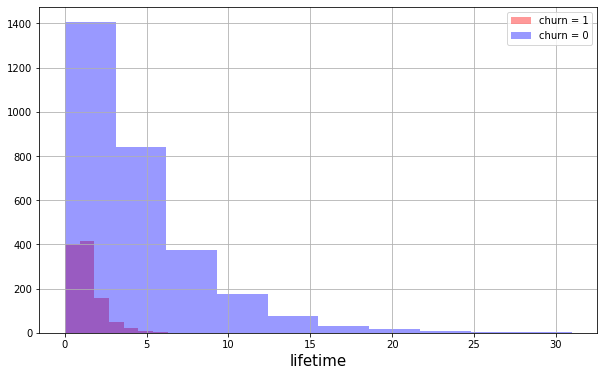

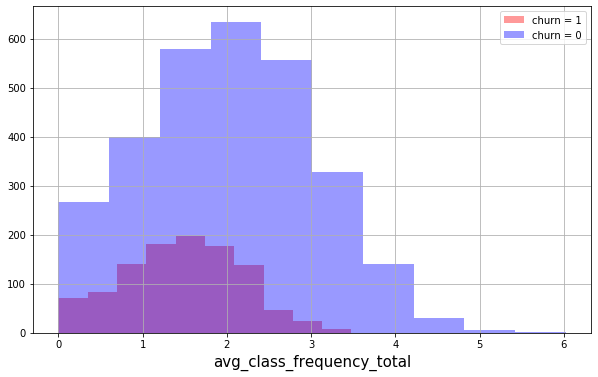

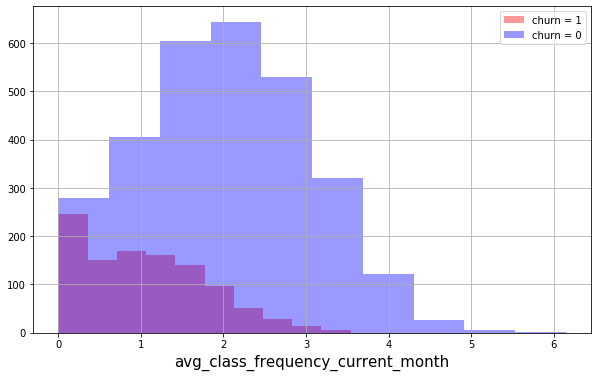

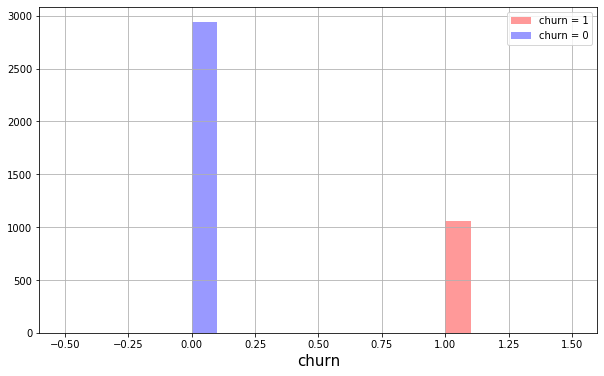

In [18]:
# plotting histogram for every feature 
for i in data.columns:
    data.query('churn == 1')[i].hist(bins=10, alpha = 0.4, figsize=(10,6),label='churn = 1', color='red')
    data.query('churn == 0')[i].hist(bins=10, alpha = 0.4, figsize=(10,6),label='churn = 0', color='blue')
    plt.xlabel(i,fontsize=15)
    plt.legend()
    plt.show()

After visualing the feature values and statistics, we have observed no outliers that could distort our further calculations and metrics.

#### Build a correlation matrix and display it.

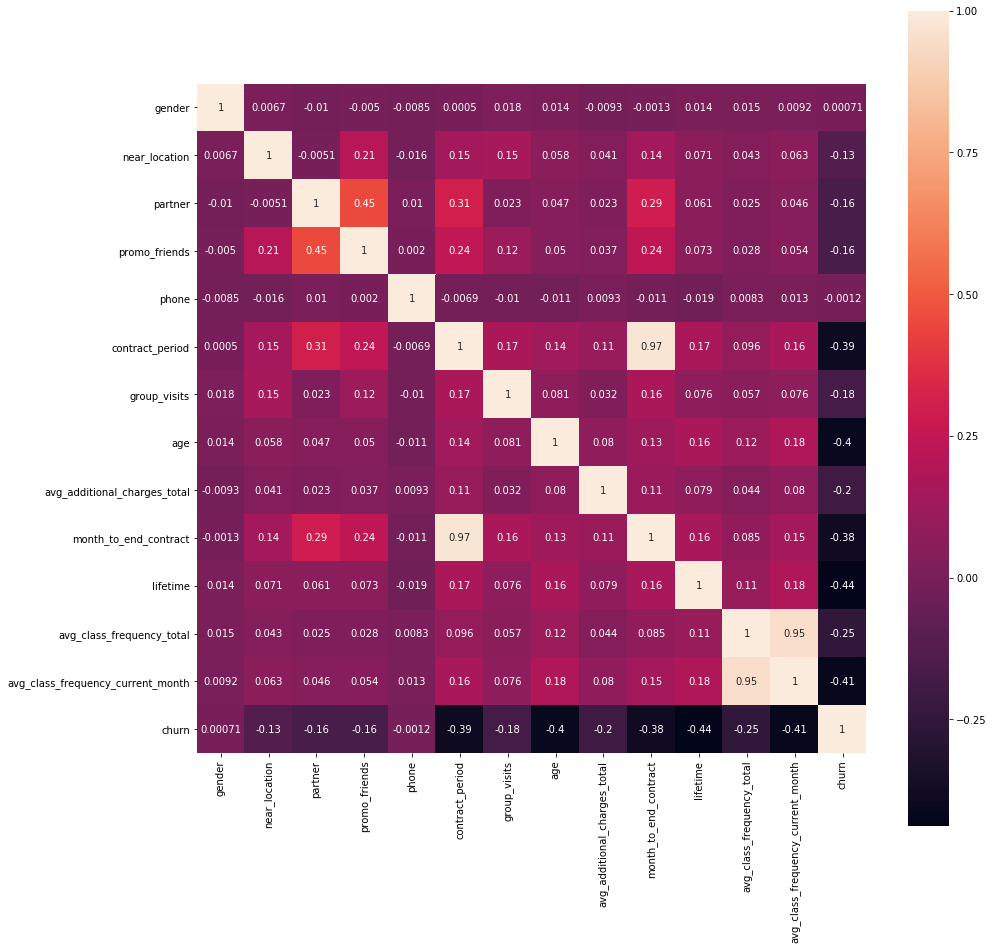

In [19]:
cm = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, square=True)
plt.show()

The correlation matrix tells us the following:
 - `contract_period` and `month_to_end_contract` have the strongest positive correlation among other features 0.97 which is quiet logical as they move in the same direction the longer the contract period the longer the month till the end of the contract.
 - `avg_class_frequency_total` and `avg_class_frequency_current_month` have also strong positive correlation = 0.95 which is again logical since total includes the current month, the higher they spend in current month, the higher it will be in total.
 - `lifetime` and `churn` have the strongest negative correlation = -0.44. The longer is customer's lifetime the less likely for them to churn.

#### Conclusion

We have done the exploratory data analysis through:
 - We have looked at statistics with the help of describe() method;
 - We have plotted several histograms and bar-plots of feature variables
 - We have built correlation matrix to see the correlation between features 

<a id='3'></a>

### Step 3. Build a model to predict user churn

In [20]:
# features (X matrix)
X = data.drop(['churn'], axis=1)

# target variable (y)
y = data['churn']

# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# Create scaler object and apply it to train set
scaler = StandardScaler()

# Train scaler and transform the matric for train set
X_train_st = scaler.fit_transform(X_train)

# apply standardization of feature matric for test set
X_test_st = scaler.transform(X_test)

# define the models to compare
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

# function that predicts model by taking data as input and outputting metrics
def make_prediction(model, X_train, y_train, X_test, y_test):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model: ', model)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('\n')

# output metric for both models
for i in models:
    make_prediction(i, X_train, y_train, X_test, y_test)

Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.93
Precision: 0.89
Recall: 0.84


Model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy: 0.92
Precision: 0.89
Recall: 0.79




#### Conclusion

We ave set the X variable for features and y variable for target which is `churn` of our dataset. We have divided the dataset to 80/20 where 80% of our dataset will be train set and remaining 20% is a validation set where we will be comparing our predictions with the actual data.
We have built binary classification models which is designed to predict the probability, in our case of churn (for the upcoming month) for each customer.
 - Accuracy is the share of accurate predictions among all predictions where closer to 1, the better. For this metric, Logistic Regression has a better score = 0.93

 - Precision tells us what share of predictions in class 1 are true by looking at the share of correct answers only in the target class, where closer to 1, the better. For this metric, Logistic Regression has a better score = 0.86

 - Recall aims at minimizing the opposite risks by demonstrating the number of real class 1 objects you were able to discover with your model where the closer to 1, the better. For this metric, Logistic Regression has a better score = 0.83

To sum up,  the Logistic Regression model gave better results and we can implement it to forecast.

<a id='4'></a>

## Step 4. Create user clusters

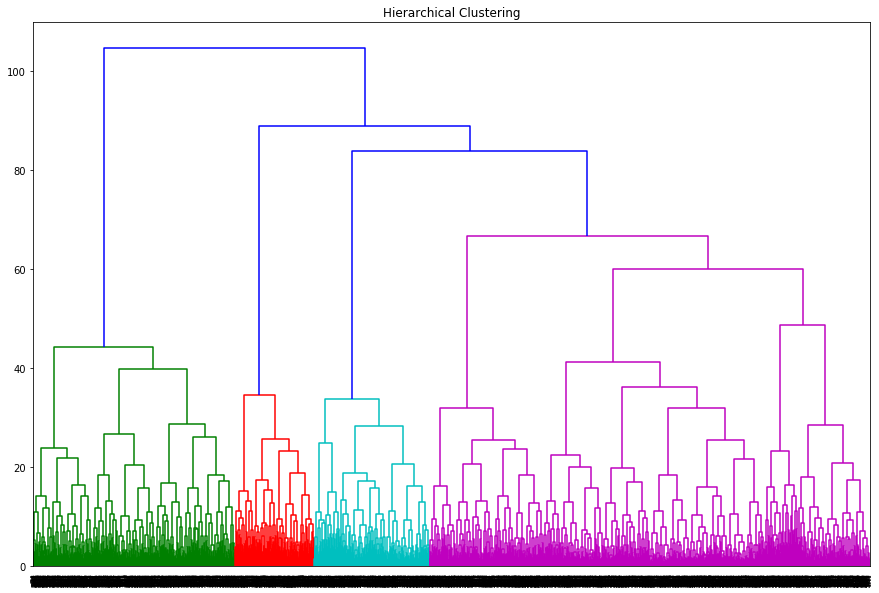

Silhouette score 0.14141242495809797


In [21]:
# Standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(X)

# Build a matrix of distances based on the standardized feature matrix
linked = linkage(x_sc, method='ward')

# Plot a dendrogram
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering')
plt.show()

# Train the clustering model with the K-means algorithm and predict customer clusters. 
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)

# calculate silhouette score
sil_score = silhouette_score(x_sc, labels)
print('Silhouette score', sil_score)

In order to use K-Means clustering (which groups objects step by step under the assumption that the number of user clusters is already known), we must determine the number of user clusters that can be identified. The distance between the objects and the agglomerative hierarchical clustering itself can be visualized with special plots called dendrograms. We have set the n = 5, clusters. We have also calculated  the silhouette score which shows the extent to which an object from a cluster is similar to its cluster, rather than to another one. The closer to 1, the better the clustering.
In our case the Silhouette score is 0.14 which is not high.

In [22]:
# Look at the mean feature values for clusters
data['cluster'] = labels

cluster_data = data.groupby('cluster').mean()
display(cluster_data)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


After dividing the dataset into clusters, let us look at their mean values and see where is the significant difference between clusters.
 - Clusters 2-3 have the highest churn which means entrants from these clusters leave most of the time comparing to other clusters.
 - Cluster 4 participants have the highest activity on a weekly basis. They visit gym almost 3 times in a week. This is the highest number among other clusters.
 - Customers from  Clusters 0 and 4 are the most loyal with the longest lifetime, and money spent on additional services of the gym. Looks like we have to pay more attention especially to these clusters and learn what features they posess to improve retention of customers from other clusters.
 - Clusters 0 and 4 participants also live near gym, they have longer contract period and actively visit group sessions of the gym.
 - Partner employees are coming mainly from cluster 0

#### Plot distributions of features for the clusters. Do you notice anything?

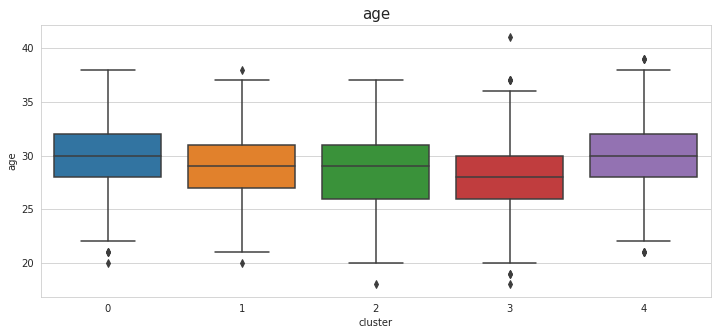

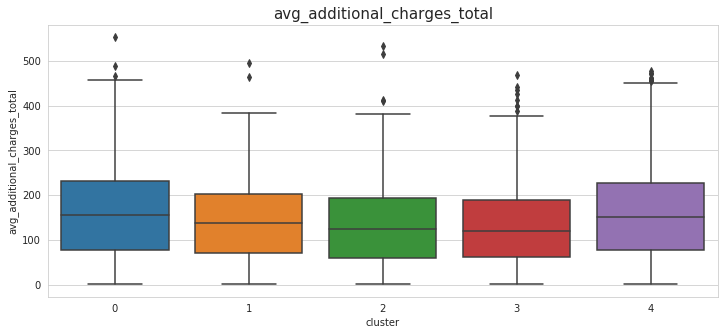

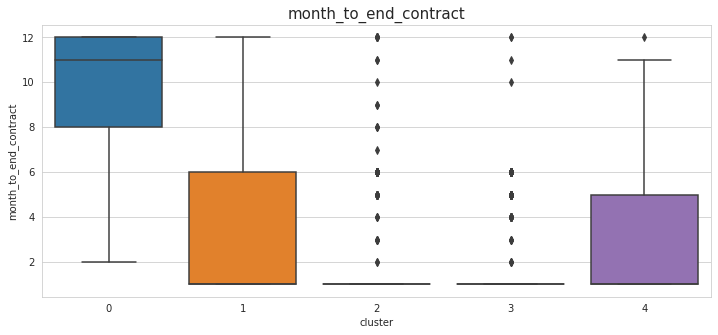

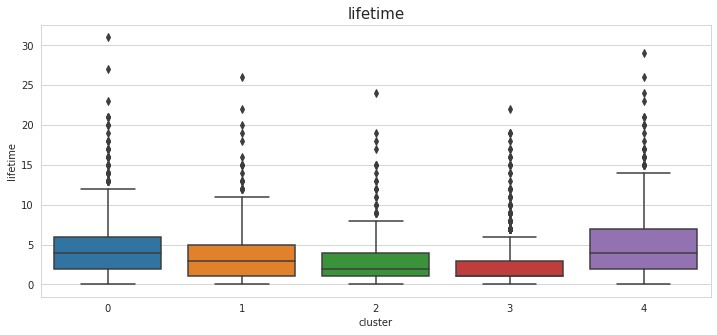

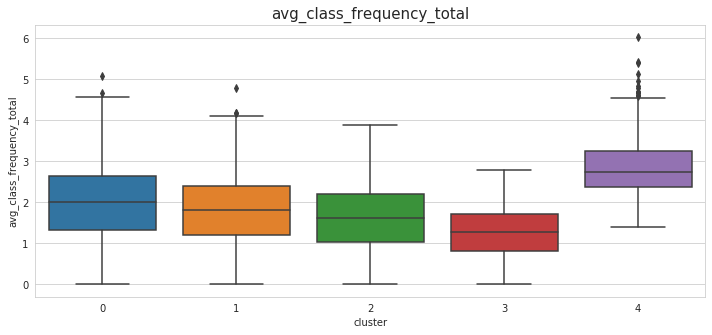

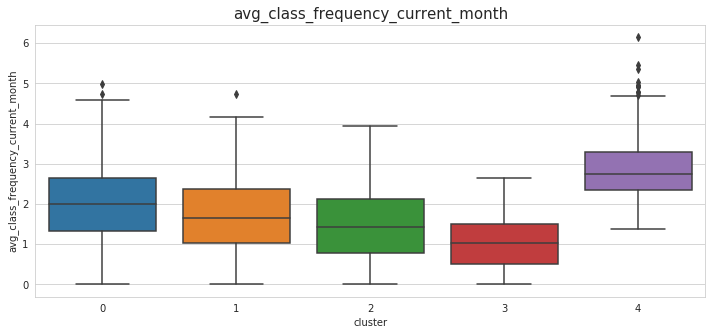

In [23]:
# plotting scatter plot for numerical values
for col in ['age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']:
    plt.figure(figsize=(12, 5))
    sns.set_style('whitegrid')
    plt.title(col, fontsize=15)
    sns.boxplot(x='cluster' , y=data[col], data=data)



We have visualized the numerical variables of the dataset, the distrubtion of features of clusters through boxplots. Mainly clusters 0 and 4 share the same trends.

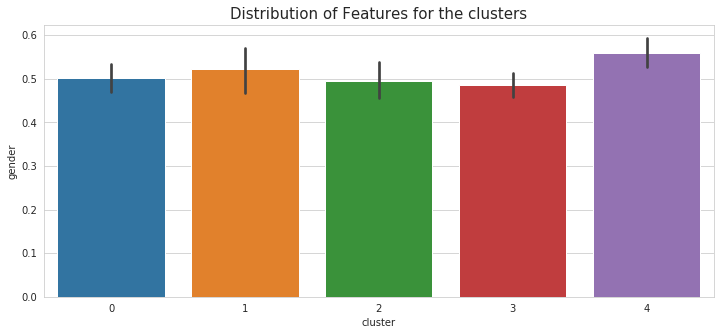

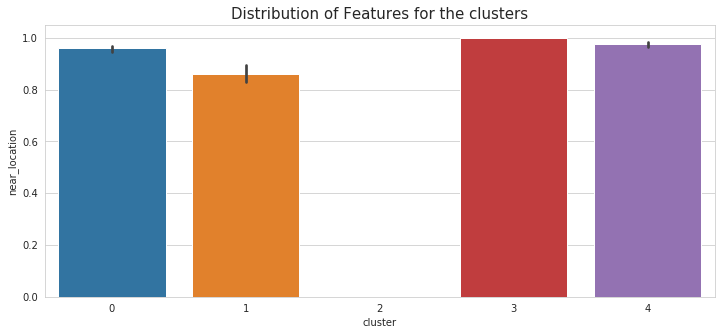

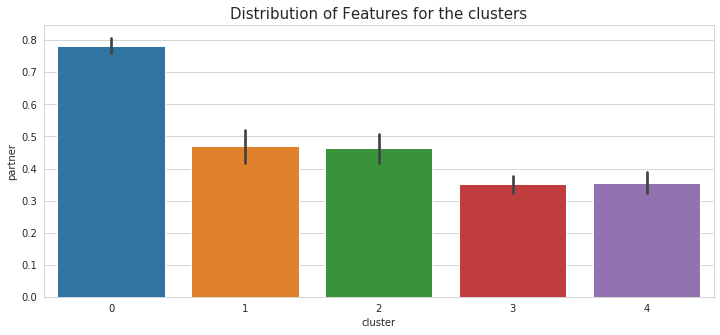

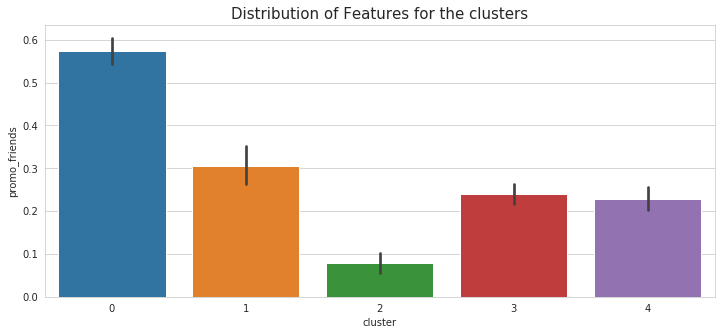

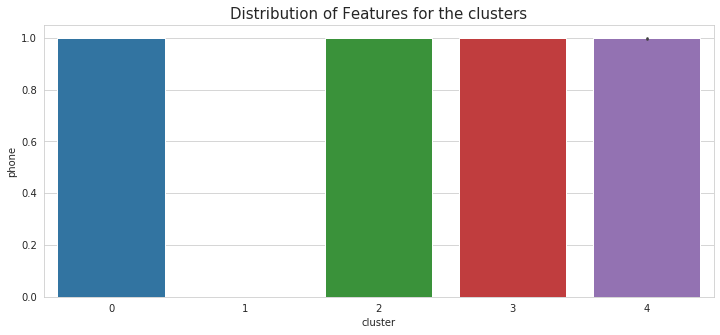

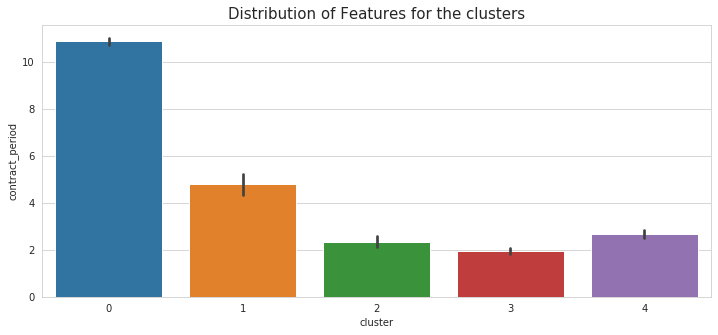

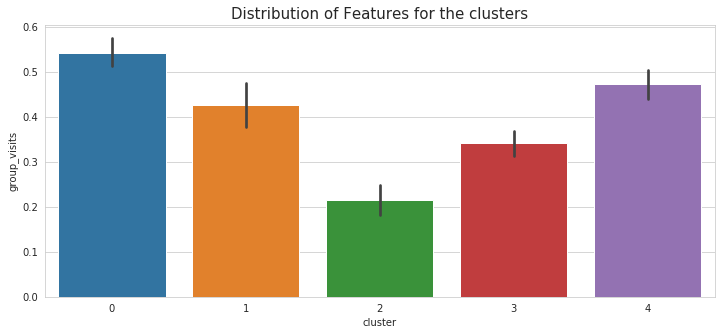

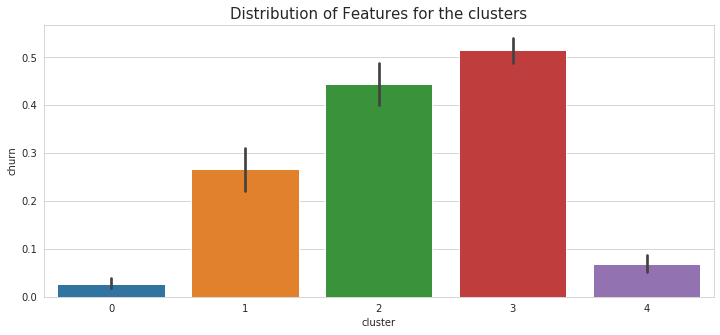

In [25]:
# plotting bar plot for binary valued columns
for col in ['gender','near_location','partner','promo_friends','phone','contract_period','group_visits','churn']:
    plt.figure(figsize=(12, 5))
    sns.set_style('whitegrid')
    plt.title('Distribution of Features for the clusters', fontsize=15)
    sns.barplot(y=col, x='cluster', data=data)

We have also visualized the binary variables' distribution through bar plots. Clusters 0 and 4 have the least churns. Cluster 2 and 3 have the least visits to group sessions. Cluster 0 customers have the longest contract period. Cluster 1 clients do not provide their phone numbers at all.

#### Calculate the churn rate for each cluster

In [26]:
data.sample()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
425,0,1,0,0,0,1,0,28,143.695888,1.0,15,3.405117,3.364224,0,1


In [27]:
# create pivot table where it is separated by cluster and calculated based on churn
churn_pivot = data.pivot_table(index='cluster', values='churn', 
                               aggfunc=['count', 'sum', lambda x: ((x.sum() / x.count())*100)]).reset_index()
churn_pivot.columns = ['cluster', 'total customers', 'churn sum', 'churn rate (%)']
display(churn_pivot)

,cluster,total customers,churn sum,churn rate (%)
0,0,1011,28,2.769535
1,1,385,103,26.753247
2,2,505,224,44.356436
3,3,1262,649,51.426307
4,4,837,57,6.810036


According to the table above, customers from clusters 3 and 2 are most likely to leave with churn rates of 51.4% and 44.3 % respectively.

#### Conclusion

In this part our analysis, where we have created clusters, calculated their features' mean value, plotted graphs and found out the churn rates. We can sum up the most important feature that plays a role whether the customer will stay with the gym or most likely leave:
 1. `near_location` feature plays vital role whether the customer stays or leaves, of course it is logical. If the gym is close to their home/office, customer most probably visits the gym.
 2. `partner` feature is also one of the most important features to improve customer retention. Employees from a partner companies also tend to be more closer and loyal to the gym than third party visitors.
 3. `promo_friends` feature also makes customer retention better. Clients come  and train together, even have the same schedule can also attract other customers by inviting their friends. Socializing is one of the key factors nowadays.
 4. `group_visits` stats also showed that the higher the participation in group sessions the lower the churn rate. Our clients who take part in group sessions most probably are more effective and accurate towards their goals. 
 5. `age` is always one of the most important factors to find the suitable target group. The average range of clients who are loyal to the gym is 27-32

<a id='5'></a>

### Step 5. Come up with conclusions and basic recommendations on working with customers

1. Data was imported and general information about the data was studied. There are 14 columns and 4000 rows in our dataset with the following description:

 - `gender` - client's gender 
 - `near_location` - whether the user lives or works in the neighborhood where the gym is located
 - `partner` - whether the user is an employee of a partner company 
 - `promo_friends` - whether the user originally signed up through a "bring a friend" offer
 - `phone` - whether the user provided their phone number
 - `contract_period`- 1 month, 3 months, 6 months, or 1 year
 - `group_visits` - whether the user takes part in group sessions
 - `age` - user's age 
 - `avg_additional_charges_total` -  the total amount of money spent on other gym services: cafe, athletic goods, cosmetics
 - `month_to_end_contract` - the months remaining until the contract expires
 - `lifetime` - the time (in months) since the customer first came to the gym
 - `avg_class_frequency_total` - average frequency of visits per week over the customer's lifetime
 - `avg_class_frequency_current_month` - average frequency of visits per week over the preceding month
 - `churn`- the fact of churn for the month in question
 

2. After conducting Exploratory data analysis, building two models for churn's prediction, creating clusters and visualizing them, we have identified the most important features that affect user's churn rate and came up with the following conclusions:
 - `near_location` feature plays vital role whether the customer stays or leaves, of course it is logical. If the gym is close to their home/office, customer most probably visits the gym.
 - `partner` feature is also one of the most important features to improve customer retention. Employees from a partner companies also tend to be more closer and loyal to the gym than third party visitors.
 - `promo_friends` feature also makes customer retention better. Clients come  and train together, even have the same schedule can also attract other customers by inviting their friends. Socializing is one of the key factors nowadays.
 - `group_visits` stats also showed that the higher the participation in group sessions the lower the churn rate. Our clients who take part in group sessions most probably are more effective and accurate towards their goals. 
 - `age` is always one of the most important factors to find the suitable target group. The average range of clients who are loyal to the gym is 27-32.
 - `avg_class_frequency_total` clients with the average frequency of visits of 2 times per week show loyalty to gym. The more often user comes to the gym, the higher is their loyalty.

3. Recommendations for betterment customer retention and lower churn rates are the following:
 - For acquiring new customers, we should focus on customers that live near to gym location, who are employees at a partner company and between the ages of 27 and 32 years. The data shows that customers who fall under one or (ideally) all of these categories are less likely to churn.
 - For already existing customers, encourage them to spend more money on other gym services  and services and increase their amount of weekly visits by providing discounts on products. These are all factors that make a customer less likely to churn.Example could be providing special training courses or showing live events in bars make visitors to stay longer or come more often. Additionally, we focus on customers who have 1-2 months before their current contract ends. This is when customers are more likely to decide whether to continue their subscription or not. 
 - Not to forget about our main target. The most loyal customers are those who are between the ages of 27 and 34, who spend the most on other gym services, who live near the location, who are employees at partner companies, who spend money on additional gym services and who visit the gym about 2 times on a weekly basis. 